# ITCR - Sede Interuniversitaria de Alajuela
# Curso IC-6200 - Inteligencia Artificial
# Aprendizaje supervisado
## Redes Neuronales Convolucionales (CNN)
### Profesora: María Mora


# Introducción

El objetivo de este documento es poner en práctica en conocimento adquirido sobre redes neuronales convolucionales por medio de desarrollar un ejemplo de clasificación de imágenes utilizando 10 clases para que los estudiantes experimenten con el proceso de implementación de las CNN utilizando PyTorch. Ejemplo basado en [1]

## Datos
----------------
PyTorch cuenta con bibliotecas para cargar y preprocesar imágenes. En el caso de visión artificial por ejemplo torchvision, incluye cargadores de datos públicos muy utilizados como Imagenet, CIFAR10, MNIST, etc. y paquetes para realizar transformaciones y cargar mini batches como torchvision.datasets y torch.utils.data.DataLoader. Esto ayuda a agilizar el tiempo de preprocesamiento de las entradas algo que se debe repetir fercuentemente. 

En este ejemplo se utilizará el conjuto de datos CIFAR-10 [2]. El conjunto de datos CIFAR-10 consta de 60,000 imágenes en color de 32x32 distribuidas en 10 clases, con 6,000 imágenes por clase. Existen 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba. El conjunto de datos fue recolectado por Alex Krizhevsky, Vinod Nair, y Geoffrey Hinton. 

Las clases de las imágenes corresponden a: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. El tamaño de las imágenes es de 3x32x32, i.e. 3-canales de color y 32x32 pixels de tamaño.

![](https://pytorch.org/tutorials/_images/cifar10.png)
Fuente:pytorch.org/tutorials


Entrenamiento de una red convolucional para clasificación de imágenes
--------------------------------------------------

Se realizarán los siguientes pasos

1. Cargar y normalizar los datos utilizando la biblioteca torchvision
2. Explorar los datos
2. Definir la red convolucional
3. Definir la función de pérdida y el optimizador
4. Entrenar la red
5. Evaluar el modelo resultante




## 1. Cargar y normalizar los datos de CIFAR10 usando torchvision.


In [1]:
# Bibliotecas requeridas para el ejercicio
# Para instalar alguna utilice por ejemplo 
#!pip install torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
   
import numpy as np

# Para graficar
%matplotlib inline
import matplotlib.pyplot as plt

#Bibliotecas generales
import torch
import torchvision
import torchvision.transforms as transforms


# Redes neuronales
import torch.nn as nn
import torch.nn.functional as F


# Pérdida y optimización
import torch.optim as optim

import os

In [5]:
# Dirección de los directorios con las imagenes a usar para etrenar y testear
data_dir = '../Proyecto3/Dataset/train' # entreno
test_dir = '../Proyecto3/Dataset/test' # testeo
valid_dir = '../Proyecto3/Dataset/valid' # validar
classes = os.listdir(data_dir) # Una lista con todas las clases de aves
print(classes)
print(len(classes))

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BANDED BROADBILL', 'BANDED PITA', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIRD', 'BEARDED REEDLING', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK & YELLOW bROADBILL', 'BLACK BAZA', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK TAIL CRAKE', 'BLACK THROATED BUSHTIT', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLONDE CRESTED WOODPECKER', 'BLUE COAU', 'BLUE GROUSE', 'BLUE HERON', 'BLUE THROATED TOUCANET', 'BOBOLINK', 'BO

In [6]:
from torchvision.datasets import ImageFolder

# Normalización: multiple images are put into a common statistical distribution in terms of size and pixel values
# Data normalization is an important step which ensures that each input parameter (pixel, in this case)
# has a similar data distribution. This makes convergence faster while training the network. ...
# The distribution of such data would resemble a Gaussian curve centered at zero

# To normalize
transform = transforms.Compose( # Transforms are common image transformations. 
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = ImageFolder(data_dir, transform=transform) # Image folder ocupa que las imagenes esten separadas en folderse
                                                    # cada folder siento la etiqueta(label) de cada imagen
testset = ImageFolder(test_dir, transform=transform)
validset = ImageFolder(valid_dir, transform=transform)

In [7]:
print(dataset)
print(dataset)
print(testset)

Dataset ImageFolder
    Number of datapoints: 45278
    Root location: ../Proyecto3/Dataset/train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset ImageFolder
    Number of datapoints: 45278
    Root location: ../Proyecto3/Dataset/train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset ImageFolder
    Number of datapoints: 1550
    Root location: ../Proyecto3/Dataset/test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [8]:
# view one image shape of the dataset.
img, label = dataset[100]
print(img.shape)

torch.Size([3, 224, 224])


In [9]:
# function for the showing the image.
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))
    
def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  AFRICAN CROWNED CRANE (0)


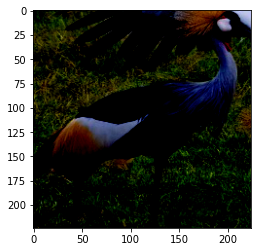

In [10]:
show_image(*dataset[20])

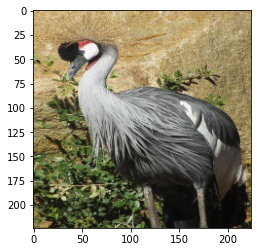

In [11]:
imshow(img)

In [12]:
torch.manual_seed(20)
train_size = len(dataset)
val_size = len(validset)
test_size = len(testset)
print(train_size, val_size, test_size)

45278 1550 1550


In [13]:
train_ds = dataset
val_ds = validset
test_ds = testset

len(train_ds), len(val_ds), len(test_ds)   

(45278, 1550, 1550)

In [15]:
from torch.utils.data.dataloader import DataLoader

batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


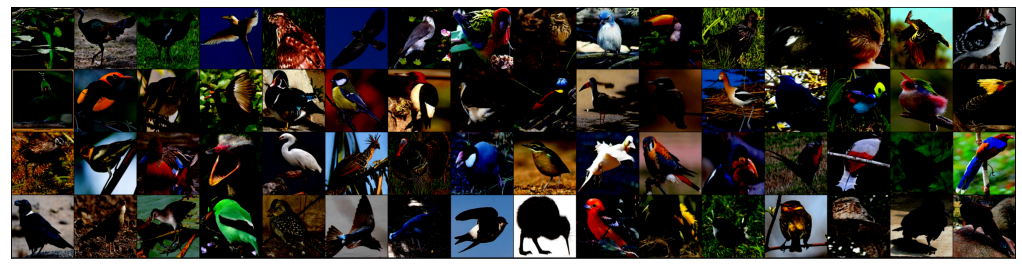

In [18]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(torchvision.utils.make_grid(images, nrow=16).permute(1,2,0))
    break

### Carga y preprocesamiento de los datos

Antes de iniciar el experimento se normalizan las imágenes utilizando torchvision.transforms.

transforms.Compose (): Separa la imagen en tres canales de color (rojo, verde y azul). Luego convierte los píxeles de cada imagen al valor del brillo entre 0 y 255. 

transforms.Normalize (): normaliza el tensor utilizando la media y desviación estándar (los dos parámetros respectivamente).


In [ ]:
# Carga de los datos divididos en datos de entrenamiento y validación.

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Cargador de datos de entrenamiento.
#Se definen objetos (tipo DataLoader) para la carga de los datos 
#en mini batches ,
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

#Datos de prueba
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)

#Calses asociadas a las imágenes.
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## 2. Exploración de los datos.

In [ ]:
# Funciones para desplegar algunas imágenes de forma aleatoria. 

def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# obtener imágenes del conjunto de entrenamiento al azar
dataiter = iter(trainloader)
images, labels = dataiter.next()

# mostrar las imágenes
imshow(torchvision.utils.make_grid(images))

# mostrar las etiquetas
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

print(torchvision.utils.make_grid(images).shape)

## 3. Definir una red convolucional


In [ ]:
# Crear el modelo de aprendizaje profundo, se crea una clase 
# que envuelve la clase nn.Module 

class CNNet(nn.Module):
    # Modelo de red convolucional.
    # :params
    #    torch.nn.Module clase que implenta la funionalidad de
    #    redes neuronales de Pytorch 

    def __init__(self): 
        # Función para definir e inicializar la red.
        super(CNNet, self).__init__()

        #capa convolucional
        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv1 = nn.Conv2d(3, 6, 5)

        #torch.nn.MaxPool2d(kernel_size, stride,...        
        self.pool = nn.MaxPool2d(2, 2)  

        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #Capas perceptrón del modelo
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        
        self.fc2 = nn.Linear(120, 84)
        
        #Salida a 10 clases 
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Aplica el modelo a los datos de entrada.
        # :param
        #   x : datos de la imagen a procesar.
        
        #Pase de la entrada por todas las capas de la red.
        #print("Tamaño del x de entrada al entrenamiento:" , x.shape)

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print("Tamaño de x luego de la convolución y pool:", x.shape)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = CNNet()

## 4. Definir la función de pérdida y el optimizador

Se utiliza la función de pérdida de entropía cruzada y optimización por descenso de gradiente estocástico (Stochastic Gradient Descent - SGD).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 5. Entrenar la red



In [ ]:
# cantidad de ciclos de entrenamiento o épocas
numEpoch = 2

for epoch in range(numEpoch):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # obtener los datos de entrada; 
        # data es una lista de la forma [inputs, labels]
        inputs, labels = data

        # inicializar los parámetros del gradiente.
        optimizer.zero_grad()

        # Se realizan las predicciones con el modelo. 
        # Este código ejecuta el forward de las entradas.
        outputs = net(inputs)
        
        # Se calcula la pérdida utilizando Cross Entropy Loss
        loss = criterion(outputs, labels)       
        loss.backward()
        
        #El optimizador realiza las actualizaciones a través del método step().
        optimizer.step()

        # imprimir estadisticas
        running_loss += loss.item()
        if i % 2000 == 1999:    # imprimir mensaje cada 2000 mini-batches
            print('[%d, %5d] pérdida: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Fin del entrenamiento')

## 6. Evaluar el modelo resultante


Para verrificar si el resultado del entrenamiento es el esperado se debe evaluar el modelo con los datos de prueba. 

Inicialmente se puede comprobar cómo se comporta el modelo con algunos de los datos de prueba.

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# imprimir algunos ejemplos y la etiqueta original (la verdad)
imshow(torchvision.utils.make_grid(images))
print('Etiqueta verdadera: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Prueba de la red con esos ejemplos

In [ ]:
outputs = net(images)

La capa de salida contiene 10 neuronas que representan las 10 clases involucradas en la clasificación. El resultado mayor indica que la imagen pertenece a la clase particular. 

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicción: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

### Calcular la presición del modelo


In [ ]:
# Se toma todos los datos de prueba y se verifica si el modelo realiza
# bien la predicción para cada uno. 

#Cantidad de imágenes clasificadas correctamente.
correct = 0

#Imágenes totales
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Exactitud de la red en las 10000 imágenes de prueba: %d %%' % (
    100 * correct / total))

### Calcular estadísticas por clase:

In [ ]:
# Se toma todos los datos de prueba y se verifica si el modelo realiza
# bien la predicción para cada una de las 10 clases individuales. 

# Cantidad de imágenes correctamente clasificadas por clase
class_correct = list(0. for i in range(10))

# Cantidad de imágenes por clase.
class_total = list(0. for i in range(10))

#Para todas las imágenes de prueba se realiza el forward
# y se evalúa si el resultado fue el correcto y la clase 
# a la que pertenece la imagen.
with torch.no_grad():
    for data in testloader:
        #Se dividen las imágenes de las etiquetas.
        images, labels = data
        
        #Se clasificacn las imágenes usando el modelo.
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        #Se compara el resultado de la predicción con el 
        # valor esperado y se cuentan los casos exitosos por clase.
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Se imprime el resultado
for i in range(10):
    print('Exactitud en %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

# Salvar y cargar el modelo 


In [ ]:
# salvar un modelo 
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# cargar un modelo
net = CNNet()
net.load_state_dict(torch.load(PATH))

Referencias
----------------
[1] PyTorch Tutorial (2017). Training a Classifier. Recuperado de https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

[2] Krizhevsky, A., Nair, G, & Hinton, G. The CIFAR-10 dataset.  Recuperado de https://www.cs.toronto.edu/~kriz/cifar.html

[3] Recommended approach for saving a model. <https://pytorch.org/docs/stable/notes/serialization.html>

[4] PyTorch layer dimensions: what size and why?. Recuperado de https://towardsdatascience.com/pytorch-layer-dimensions-what-sizes-should-they-be-and-why-4265a41e01fd


